In [1]:
from datetime import datetime
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import pandas as pd
import duckdb as db
import  os as os
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'google.cloud'

Sushiswap: https://thegraph.com/explorer/subgraphs/7h1x51fyT5KigAhXd8sdE3kzzxQDJxxz1y66LTFiC3mS?view=Playground
Curve: https://thegraph.com/explorer/subgraphs/GAGwGKc4ArNKKq9eFTcwgd1UGymvqhTier9Npqo1YvZB?view=Playground
Balancer: https://thegraph.com/explorer/subgraphs/Ei5typKWPepPSgqkaKf3p5bPhgJesnu1RuRpyt69Pcrx?view=Overview
Uniswap: https://thegraph.com/explorer/subgraphs/ELUcwgpm14LKPLrBRuVvPvNKHQ9HvwmtKgKSH6123cr7?view=Playground

In [ ]:
sg = Subgrounds()
apiKey = file = input('API Key, please')

In [3]:
##SUSHISWAP POOLS
sushi7 = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/7h1x51fyT5KigAhXd8sdE3kzzxQDJxxz1y66LTFiC3mS')
listLength=1000
trigger=0
pool_list = pd.DataFrame()


pools7 = sushi7.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        first=1000,
        where={ 'pool_in': ['0xfffae4a0f4ac251f4705717cd24cadccc9f33e06','0x055475920a8c93cffb64d039a8205f7acc7722d3'] }
    )

pool_data7 = sg.query_df([
     pools7.id
    ,pools7.timestamp
    ,pools7.blockNumber
    ,pools7.totalValueLockedUSD
    ,pools7.cumulativeSupplySideRevenueUSD
    ,pools7.dailySupplySideRevenueUSD
    ,pools7.cumulativeProtocolSideRevenueUSD
    ,pools7.dailyProtocolSideRevenueUSD
    ,pools7.cumulativeTotalRevenueUSD
    ,pools7.dailyTotalRevenueUSD
    ,pools7.dailyVolumeUSD
    ,pools7.cumulativeVolumeUSD
    ,pools7.outputTokenSupply
    ,pools7.outputTokenPriceUSD
    ,pools7.stakedOutputTokenAmount
    ,pools7.pool.name
    ,pools7.pool.symbol
    ,pools7.pool.outputToken
])

pool_list = db.query("select "
               "    * "
                    " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                     ",'Sushi' as dex "
               "From pool_data7 "
               #"where lower(liquidityPools_name) like lower('%olympus%') "
                #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
               #" limit 100 "
               ).df()
ticker = 1
listLength = len(pool_list)
pool_list_length = len(pool_list)
sushi_pool_datadb = pool_list

while listLength>999:
    #listLength=0
    skipValue = (ticker)*(1000)
    pools7 = sushi7.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        skip =(skipValue),
        first=1000,
        where={ 'pool_in': ['0xfffae4a0f4ac251f4705717cd24cadccc9f33e06','0x055475920a8c93cffb64d039a8205f7acc7722d3'] }
    )

    pool_data7 = sg.query_df([
         pools7.id
        ,pools7.timestamp
        ,pools7.blockNumber
        ,pools7.totalValueLockedUSD
        ,pools7.cumulativeSupplySideRevenueUSD
        ,pools7.dailySupplySideRevenueUSD
        ,pools7.cumulativeProtocolSideRevenueUSD
        ,pools7.dailyProtocolSideRevenueUSD
        ,pools7.cumulativeTotalRevenueUSD
        ,pools7.dailyTotalRevenueUSD
        ,pools7.dailyVolumeUSD
        ,pools7.cumulativeVolumeUSD
        ,pools7.outputTokenSupply
        ,pools7.outputTokenPriceUSD
        ,pools7.stakedOutputTokenAmount
        ,pools7.pool.name
        ,pools7.pool.symbol
        ,pools7.pool.outputToken
    ])

    sushi_pool_datadb = db.query("select "
                   "    * "
                        " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                         ",'Sushi' as dex "
                   "From pool_data7 "
                   #"where lower(liquidityPools_name) like lower('%olympus%') "
                    #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
                   #" limit 100 "
                   ).df()

    pool_list=pd.concat([pool_list, sushi_pool_datadb])
    recordTimestamp = pool_list.iat[ticker,1]
    ticker = ticker+1
    pool_list_length = len(pool_list)
    listLength = len(sushi_pool_datadb)
    value1 = pool_list.iat[ticker,23]
    #pool_datadb7 = pd.DataFrame(None)
    sushi_pool_datadb = pool_list
    print("ticker: ", ticker," - records collected: ", listLength, " - token: ",value1 , " - pool list length: ", pool_list_length, " - record from: ", recordTimestamp)

ticker:  2  - records collected:  22  - token:  2023-01-21 00:46:11  - pool list length:  1022  - record from:  1674385499


In [1]:
##BALANCER POOLS
balancer = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/Ei5typKWPepPSgqkaKf3p5bPhgJesnu1RuRpyt69Pcrx')
listLength=1000
trigger=0
pool_list = pd.DataFrame()


pools7 = balancer.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        first=1000,
        where={ 'pool_in': ['0xd1ec5e215e8148d76f4460e4097fd3d5ae0a3558','0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9','0x2de32a7c98c3ef6ec79e703500e8ca5b2ec819aa', '0xf5f6fb82649df7991054ef796c39da81b93364df', '0xfb46bc8fc0d06421d362a31b7230f39462efa79a', '0xc45d42f801105e861e86658648e3678ad7aa70f9'] }

    )

pool_data7 = sg.query_df([
     pools7.id
    ,pools7.timestamp
    ,pools7.blockNumber
    ,pools7.totalValueLockedUSD
    ,pools7.cumulativeSupplySideRevenueUSD
    ,pools7.dailySupplySideRevenueUSD
    ,pools7.cumulativeProtocolSideRevenueUSD
    ,pools7.dailyProtocolSideRevenueUSD
    ,pools7.cumulativeTotalRevenueUSD
    ,pools7.dailyTotalRevenueUSD
    ,pools7.dailyVolumeUSD
    ,pools7.cumulativeVolumeUSD
    ,pools7.outputTokenSupply
    ,pools7.outputTokenPriceUSD
    ,pools7.stakedOutputTokenAmount
    ,pools7.pool.name
    ,pools7.pool.symbol
    ,pools7.pool.outputToken
])

pool_list = db.query("select "
               "    * "
                    " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                     ",'Balancer' as dex "
               "From pool_data7 "
               #"where lower(liquidityPools_name) like lower('%olympus%') "
                #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
               #" limit 100 "
               ).df()
ticker = 1
balancer_pool_datadb = pool_list
listLength = len(pool_list)
pool_list_length = len(pool_list)

while listLength>999:
    #listLength=0
    skipValue = (ticker)*(1000)
    pools7 = balancer.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        skip =(skipValue),
        first=1000,
        where={ 'pool_in': ['0xd1ec5e215e8148d76f4460e4097fd3d5ae0a3558','0x76fcf0e8c7ff37a47a799fa2cd4c13cde0d981c9','0x2de32a7c98c3ef6ec79e703500e8ca5b2ec819aa', '0xf5f6fb82649df7991054ef796c39da81b93364df', '0xfb46bc8fc0d06421d362a31b7230f39462efa79a', '0xc45d42f801105e861e86658648e3678ad7aa70f9'] }
        )


    pool_data7 = sg.query_df([
         pools7.id
        ,pools7.timestamp
        ,pools7.blockNumber
        ,pools7.totalValueLockedUSD
        ,pools7.cumulativeSupplySideRevenueUSD
        ,pools7.dailySupplySideRevenueUSD
        ,pools7.cumulativeProtocolSideRevenueUSD
        ,pools7.dailyProtocolSideRevenueUSD
        ,pools7.cumulativeTotalRevenueUSD
        ,pools7.dailyTotalRevenueUSD
        ,pools7.dailyVolumeUSD
        ,pools7.cumulativeVolumeUSD
        ,pools7.outputTokenSupply
        ,pools7.outputTokenPriceUSD
        ,pools7.stakedOutputTokenAmount
        ,pools7.pool.name
        ,pools7.pool.symbol
        ,pools7.pool.outputToken
    ])

    balancer_pool_datadb = db.query("select "
                   "    * "
                        " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                         ",'Balancer' as dex "
                   "From pool_data7 "
                   #"where lower(liquidityPools_name) like lower('%olympus%') "
                    #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
                   #" limit 100 "
                   ).df()

    pool_list=pd.concat([pool_list, balancer_pool_datadb])
    recordTimestamp = pool_list.iat[ticker,1]
    ticker = ticker+1
    pool_list_length = len(pool_list)
    listLength = len(balancer_pool_datadb)
    value1 = pool_list.iat[ticker,23]
    balancer_pool_datadb = pool_list

print("ticker: ", ticker," - records collected: ", listLength, " - token: ",value1 , " - pool list length: ", pool_list_length, " - record from: ", recordTimestamp)

NameError: name 'sg' is not defined

In [5]:
##UNISWAP POOLS
uniswap = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/ELUcwgpm14LKPLrBRuVvPvNKHQ9HvwmtKgKSH6123cr7')
listLength=1000
trigger=0
pool_list = pd.DataFrame()

pools7 = uniswap.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        first=1000,
        where={ 'pool_in': ['0x88051b0eea095007d3bef21ab287be961f3d8598','0xc987d503a9f78f6d1d782c1fff5af4cb34437e3f','0x08f68110f1e0ca67c80a24b4bd206675610f445d','0xeac758487f4868952ac9bf5b5eb885bcf462aa67','0xcf7e21b96a7dae8e1663b5a266fd812cbe973e70','0x1ba81d6cec9eb0e2f9fff78b9379bedc04150461'] }

    )

pool_data7 = sg.query_df([
     pools7.id
    ,pools7.timestamp
    ,pools7.blockNumber
    ,pools7.totalValueLockedUSD
    ,pools7.cumulativeSupplySideRevenueUSD
    ,pools7.dailySupplySideRevenueUSD
    ,pools7.cumulativeProtocolSideRevenueUSD
    ,pools7.dailyProtocolSideRevenueUSD
    ,pools7.cumulativeTotalRevenueUSD
    ,pools7.dailyTotalRevenueUSD
    ,pools7.dailyVolumeUSD
    ,pools7.cumulativeVolumeUSD
    ,pools7.outputTokenSupply
    ,pools7.outputTokenPriceUSD
    ,pools7.stakedOutputTokenAmount
    ,pools7.pool.name
    ,pools7.pool.symbol
    ,pools7.pool.outputToken
])

pool_list = db.query("select "
               "    * "
                    " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                     ",'Uniswap' as dex "
               "From pool_data7 "
               #"where lower(liquidityPools_name) like lower('%olympus%') "
                #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
               #" limit 100 "
               ).df()
ticker = 1

listLength = len(pool_list)
pool_list_length = len(pool_list)
print('first pull: '+ str(pool_list_length) )
uniswap_pool_datadb = pool_list


while listLength>999:
    #listLength=0
    skipValue = (ticker)*(1000)
    pools7 = uniswap.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        skip =(skipValue),
        first=1000,
        where={ 'pool_in': ['0x88051b0eea095007d3bef21ab287be961f3d8598','0xc987d503a9f78f6d1d782c1fff5af4cb34437e3f','0x08f68110f1e0ca67c80a24b4bd206675610f445d','0xeac758487f4868952ac9bf5b5eb885bcf462aa67','0xcf7e21b96a7dae8e1663b5a266fd812cbe973e70','0x1ba81d6cec9eb0e2f9fff78b9379bedc04150461'] }
        )


    pool_data7 = sg.query_df([
         pools7.id
        ,pools7.timestamp
        ,pools7.blockNumber
        ,pools7.totalValueLockedUSD
        ,pools7.cumulativeSupplySideRevenueUSD
        ,pools7.dailySupplySideRevenueUSD
        ,pools7.cumulativeProtocolSideRevenueUSD
        ,pools7.dailyProtocolSideRevenueUSD
        ,pools7.cumulativeTotalRevenueUSD
        ,pools7.dailyTotalRevenueUSD
        ,pools7.dailyVolumeUSD
        ,pools7.cumulativeVolumeUSD
        ,pools7.outputTokenSupply
        ,pools7.outputTokenPriceUSD
        ,pools7.stakedOutputTokenAmount
        ,pools7.pool.name
        ,pools7.pool.symbol
        ,pools7.pool.outputToken
    ])

    uniswap_pool_datadb = db.query("select "
                   "    * "
                        " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                         ",'Uniswap' as dex "
                   "From pool_data7 "
                   #"where lower(liquidityPools_name) like lower('%olympus%') "
                    #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
                   #" limit 100 "
                   ).df()

    pool_list=pd.concat([pool_list, uniswap_pool_datadb])
    recordTimestamp = pool_list.iat[ticker,1]
    ticker = ticker+1
    pool_list_length = len(pool_list)
    listLength = len(uniswap_pool_datadb)
    value1 = pool_list.iat[ticker,23]
    uniswap_pool_datadb = pool_list

print("ticker: ", ticker," - records collected: ", listLength, " - token: ",value1 , " - pool list length: ", pool_list_length, " - record from: ", recordTimestamp)
uniswap_pool_datadb.head(10)

first pull: 926
ticker:  1  - records collected:  926  - token:  2023-01-21 00:46:11  - pool list length:  926  - record from:  1674385499


,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19371,1673734463,16407961,0.000205,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-14 22:14:23,Uniswap
1,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19370,1673632487,16399496,253973.900275,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-13 17:54:47,Uniswap
2,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19369,1673546303,16392360,265156.334335,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-12 17:58:23,Uniswap
3,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19368,1673480375,16386897,302821.506602,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-11 23:39:35,Uniswap
4,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19367,1673392739,16379642,366839.805871,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-10 23:18:59,Uniswap
5,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19366,1673279723,16370274,399792.750775,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-09 15:55:23,Uniswap
6,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19365,1673219723,16365289,444798.922641,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-08 23:15:23,Uniswap
7,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19364,1673135471,16358302,462039.278238,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-07 23:51:11,Uniswap
8,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19363,1673024723,16349119,472588.006073,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-06 17:05:23,Uniswap
9,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19361,1672835039,16333404,488907.136793,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-04 12:23:59,Uniswap


In [6]:
##CURVE POOLS
curve = sg.load_api('https://gateway.thegraph.com/api/'+apiKey+'/subgraphs/id/GAGwGKc4ArNKKq9eFTcwgd1UGymvqhTier9Npqo1YvZB')
listLength=1000
trigger=0
pool_list = pd.DataFrame()


pools7 = curve.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        first=1000,
        where={ 'pool_in': ['0xfc1e8bf3e81383ef07be24c3fd146745719de48d','0x6ec38b3228251a0c5d491faf66858e2e23d7728b'] }
    )

pool_data7 = sg.query_df([
     pools7.id
    ,pools7.timestamp
    ,pools7.blockNumber
    ,pools7.totalValueLockedUSD
    ,pools7.cumulativeSupplySideRevenueUSD
    ,pools7.dailySupplySideRevenueUSD
    ,pools7.cumulativeProtocolSideRevenueUSD
    ,pools7.dailyProtocolSideRevenueUSD
    ,pools7.cumulativeTotalRevenueUSD
    ,pools7.dailyTotalRevenueUSD
    ,pools7.dailyVolumeUSD
    ,pools7.cumulativeVolumeUSD
    ,pools7.outputTokenSupply
    ,pools7.outputTokenPriceUSD
    ,pools7.stakedOutputTokenAmount
    ,pools7.pool.name
    ,pools7.pool.symbol
    ,pools7.pool.outputToken
])

pool_list = db.query("select "
               "    * "
                    " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                     ",'Curve' as dex "
               "From pool_data7 "
               #"where lower(liquidityPools_name) like lower('%olympus%') "
                #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
               #" limit 100 "
               ).df()
ticker = 1
listLength = len(pool_list)
pool_list_length = len(pool_list)
curve_pool_datadb = pool_list

while listLength>999:
    #listLength=0
    skipValue = (ticker)*(1000)
    pools7 = curve.Query.liquidityPoolDailySnapshots(
        orderBy='id',
        orderDirection='desc',
        skip =(skipValue),
        first=1000,
        where={ 'pool_in': ['0xfc1e8bf3e81383ef07be24c3fd146745719de48d','0x6ec38b3228251a0c5d491faf66858e2e23d7728b'] }
    )

    pool_data7 = sg.query_df([
         pools7.id
        ,pools7.timestamp
        ,pools7.blockNumber
        ,pools7.totalValueLockedUSD
        ,pools7.cumulativeSupplySideRevenueUSD
        ,pools7.dailySupplySideRevenueUSD
        ,pools7.cumulativeProtocolSideRevenueUSD
        ,pools7.dailyProtocolSideRevenueUSD
        ,pools7.cumulativeTotalRevenueUSD
        ,pools7.dailyTotalRevenueUSD
        ,pools7.dailyVolumeUSD
        ,pools7.cumulativeVolumeUSD
        ,pools7.outputTokenSupply
        ,pools7.outputTokenPriceUSD
        ,pools7.stakedOutputTokenAmount
        ,pools7.pool.name
        ,pools7.pool.symbol
        ,pools7.pool.outputToken
    ])



    pool_list=pd.concat([pool_list, curve_pool_datadb])
    recordTimestamp = pool_list.iat[ticker,1]
    ticker = ticker+1    curve_pool_datadb = db.query("select "
                   "    * "
                        " ,to_timestamp(liquidityPoolDailySnapshots_timestamp) dateTime"
                         ",'Curve' as dex "
                   "From pool_data7 "
                   #"where lower(liquidityPools_name) like lower('%olympus%') "
                    #    "or lower(pairs_token1_symbol) like lower('%OHM%')  "
                   #" limit 100 "
                   ).df()
    pool_list_length = len(pool_list)
    listLength = len(curve_pool_datadb)
    value1 = pool_list.iat[ticker,23]
    #pool_datadb7 = pd.DataFrame(None)
    curve_pool_datadb = pool_list

print("ticker: ", ticker," - records collected: ", listLength, " - token: ",value1 , " - pool list length: ", pool_list_length, " - record from: ", recordTimestamp)

ticker:  1  - records collected:  297  - token:  2023-01-21 00:46:11  - pool list length:  297  - record from:  1674385499


In [7]:
sushi_pool_datadb.head(5)

,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19380,1674475967,16469426,18586.001222,3.908946e+06,0.238775,781789.168532,0.047755,4.690735e+06,0.286530,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18,0.0,0,2023-01-23 12:12:47,Sushi
1,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19379,1674385499,16461925,18799.632716,3.908946e+06,0.163802,781789.120777,0.032760,4.690735e+06,0.196563,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18,0.0,0,2023-01-22 11:04:59,Sushi
2,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19378,1674261971,16451685,18790.094259,3.908945e+06,0.124843,781789.088016,0.024969,4.690735e+06,0.149811,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18,0.0,0,2023-01-21 00:46:11,Sushi
3,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19377,1674238127,16449712,18350.916941,3.908945e+06,0.376670,781789.063048,0.075334,4.690734e+06,0.452004,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18,0.0,0,2023-01-20 18:08:47,Sushi
4,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19376,1674088439,16437299,17744.690456,3.908945e+06,0.404097,781788.987714,0.080819,4.690734e+06,0.484916,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18,0.0,0,2023-01-19 00:33:59,Sushi


In [8]:
print(len(sushi_pool_datadb))

1022


In [9]:
balancer_pool_datadb.head(5)

,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xfb46bc8fc0d06421d362a31b7230f39462efa79a-19379,1674396455,16462836,4085.916198,115.132723,2.802956,115.132723,2.802956,230.265447,5.605913,...,20OHM-80FDT,20OHM-80FDT,0xfb46bc8fc0d06421d362a31b7230f39462efa79a,20OHM-80FDT,20OHM-80FDT,18,0.003662,16462835,2023-01-22 14:07:35,Balancer
1,0xfb46bc8fc0d06421d362a31b7230f39462efa79a-19378,1674305123,16455259,18853.743039,112.329767,0.710169,112.329767,0.710169,224.659534,1.420339,...,20OHM-80FDT,20OHM-80FDT,0xfb46bc8fc0d06421d362a31b7230f39462efa79a,20OHM-80FDT,20OHM-80FDT,18,0.003662,16462835,2023-01-21 12:45:23,Balancer
2,0xfb46bc8fc0d06421d362a31b7230f39462efa79a-19372,1673794799,16412954,3553.837470,111.619598,1.139388,111.619598,1.139388,223.239195,2.278776,...,20OHM-80FDT,20OHM-80FDT,0xfb46bc8fc0d06421d362a31b7230f39462efa79a,20OHM-80FDT,20OHM-80FDT,18,0.003662,16462835,2023-01-15 14:59:59,Balancer
3,0xfb46bc8fc0d06421d362a31b7230f39462efa79a-19371,1673686259,16403963,3042.818559,110.480210,0.298436,110.480210,0.298436,220.960419,0.596872,...,20OHM-80FDT,20OHM-80FDT,0xfb46bc8fc0d06421d362a31b7230f39462efa79a,20OHM-80FDT,20OHM-80FDT,18,0.003662,16462835,2023-01-14 08:50:59,Balancer
4,0xfb46bc8fc0d06421d362a31b7230f39462efa79a-19369,1673494967,16388108,2945.451220,110.181773,0.021163,110.181773,0.021163,220.363547,0.042325,...,20OHM-80FDT,20OHM-80FDT,0xfb46bc8fc0d06421d362a31b7230f39462efa79a,20OHM-80FDT,20OHM-80FDT,18,0.003662,16462835,2023-01-12 03:42:47,Balancer


In [10]:
print(len(balancer_pool_datadb))

799


In [11]:
uniswap_pool_datadb.head(5)

,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19371,1673734463,16407961,0.000205,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-14 22:14:23,Uniswap
1,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19370,1673632487,16399496,253973.900275,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-13 17:54:47,Uniswap
2,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19369,1673546303,16392360,265156.334335,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-12 17:58:23,Uniswap
3,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19368,1673480375,16386897,302821.506602,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-11 23:39:35,Uniswap
4,0xeac758487f4868952ac9bf5b5eb885bcf462aa67-19367,1673392739,16379642,366839.805871,0.0,0.0,0.0,0.0,0.0,0.0,...,Uniswap V3 Governance OHM/Temple 1%,Governance OHM/Temple,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-10 23:18:59,Uniswap


In [12]:
print(len(uniswap_pool_datadb))

926


In [13]:
curve_pool_datadb.head(10)

,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19377,1674245327,16450305,0.0,84.167386,1.102027,84.167386,1.102027,168.334771,2.204054,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2023-01-20 20:08:47,Curve
1,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19374,1673962727,16426872,0.0,83.065359,3.343477,83.065359,3.343477,166.130717,6.686953,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2023-01-17 13:38:47,Curve
2,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19370,1673605055,16397224,0.0,79.721882,1.610282,79.721882,1.610282,159.443764,3.220563,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2023-01-13 10:17:35,Curve
3,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19366,1673234519,16366521,0.0,78.111601,3.009026,78.111601,3.009026,156.223201,6.018051,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2023-01-09 03:21:59,Curve
4,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19353,1672151507,16276696,0.0,75.102575,1.862547,75.102575,1.862547,150.205150,3.725094,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2022-12-27 14:31:47,Curve
5,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19350,1671843179,16251135,0.0,73.240028,1.963777,73.240028,1.963777,146.480056,3.927554,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2022-12-24 00:52:59,Curve
6,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19348,1671742235,16242745,0.0,71.276251,1.843418,71.276251,1.843418,142.552502,3.686837,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2022-12-22 20:50:35,Curve
7,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19346,1671524783,16224703,0.0,69.432833,0.986180,69.432833,0.986180,138.865665,1.972359,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2022-12-20 08:26:23,Curve
8,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19344,1671403991,16214686,0.0,68.446653,0.062019,68.446653,0.062019,136.893306,0.124037,...,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,0x5271045f7b73c17825a7a7aee6917ee46b0b7520,Curve.fi Factory Crypto Pool: OHM/FRAXBP,OHMFRAXBP-f,18,0.0,15944840,2022-12-18 22:53:11,Curve
9,0xfc1e8bf3e81383ef07be24c3fd146745719de48d-19339,1670912663,16173973,0.0,68.384634,2.156164,68.384634,2.156164,136.769268,4.312328,.

In [14]:
pool_data = pd.concat([sushi_pool_datadb,balancer_pool_datadb,uniswap_pool_datadb,curve_pool_datadb])
pool_data.head(500)

,liquidityPoolDailySnapshots_id,liquidityPoolDailySnapshots_timestamp,liquidityPoolDailySnapshots_blockNumber,liquidityPoolDailySnapshots_totalValueLockedUSD,liquidityPoolDailySnapshots_cumulativeSupplySideRevenueUSD,liquidityPoolDailySnapshots_dailySupplySideRevenueUSD,liquidityPoolDailySnapshots_cumulativeProtocolSideRevenueUSD,liquidityPoolDailySnapshots_dailyProtocolSideRevenueUSD,liquidityPoolDailySnapshots_cumulativeTotalRevenueUSD,liquidityPoolDailySnapshots_dailyTotalRevenueUSD,...,liquidityPoolDailySnapshots_pool_name,liquidityPoolDailySnapshots_pool_symbol,liquidityPoolDailySnapshots_pool_outputToken_id,liquidityPoolDailySnapshots_pool_outputToken_name,liquidityPoolDailySnapshots_pool_outputToken_symbol,liquidityPoolDailySnapshots_pool_outputToken_decimals,liquidityPoolDailySnapshots_pool_outputToken_lastPriceUSD,liquidityPoolDailySnapshots_pool_outputToken_lastPriceBlockNumber,dateTime,dex
0,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19380,1674475967,16469426,18586.001222,3.908946e+06,0.238775,781789.168532,0.047755,4.690735e+06,0.286530,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2023-01-23 12:12:47,Sushi
1,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19379,1674385499,16461925,18799.632716,3.908946e+06,0.163802,781789.120777,0.032760,4.690735e+06,0.196563,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2023-01-22 11:04:59,Sushi
2,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19378,1674261971,16451685,18790.094259,3.908945e+06,0.124843,781789.088016,0.024969,4.690735e+06,0.149811,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2023-01-21 00:46:11,Sushi
3,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19377,1674238127,16449712,18350.916941,3.908945e+06,0.376670,781789.063048,0.075334,4.690734e+06,0.452004,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2023-01-20 18:08:47,Sushi
4,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-19376,1674088439,16437299,17744.690456,3.908945e+06,0.404097,781788.987714,0.080819,4.690734e+06,0.484916,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2023-01-19 00:33:59,Sushi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-18872,1630618501,13148760,18452.528742,1.500423e+04,22.735181,3000.845739,4.547036,1.800507e+04,27.282218,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2021-09-02 21:35:01,Sushi
496,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-18871,1630539552,13142794,18204.142391,1.498149e+04,15.918570,2996.298703,3.183714,1.797779e+04,19.102284,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2021-09-01 23:39:12,Sushi
497,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-18870,1630444987,13135720,17260.930023,1.496557e+04,20.600304,2993.114989,4.120061,1.795869e+04,24.720365,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wrapped Ether,18.0,0.0,0.0,2021-08-31 21:23:07,Sushi
498,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06-18869,1630367769,13129970,17396.104210,1.494497e+04,4.637978,2988.994928,0.927596,1.793397e+04,5.565573,...,SushiSwap Olympus/Wrapped Ether,Olympus/Wrapped Ether,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,Olympus/Wrapped Ether LP,Olympus/Wra

In [15]:
global file
file = input('Selet a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".
path =file+'/LPsnapshots '+str(date.today().strftime("%b-%d-%Y"))+str(len(pool_data))+'records.csv'
pool_data.to_csv(path, index = False)

In [16]:
print(len(pool_data))

3044


[Text(0.5, 1.0, 'Total Pool Liquidity per DEX'), Text(0.5, 0, 'DEX'), Text(0, 0.5, 'TVL - USD')]


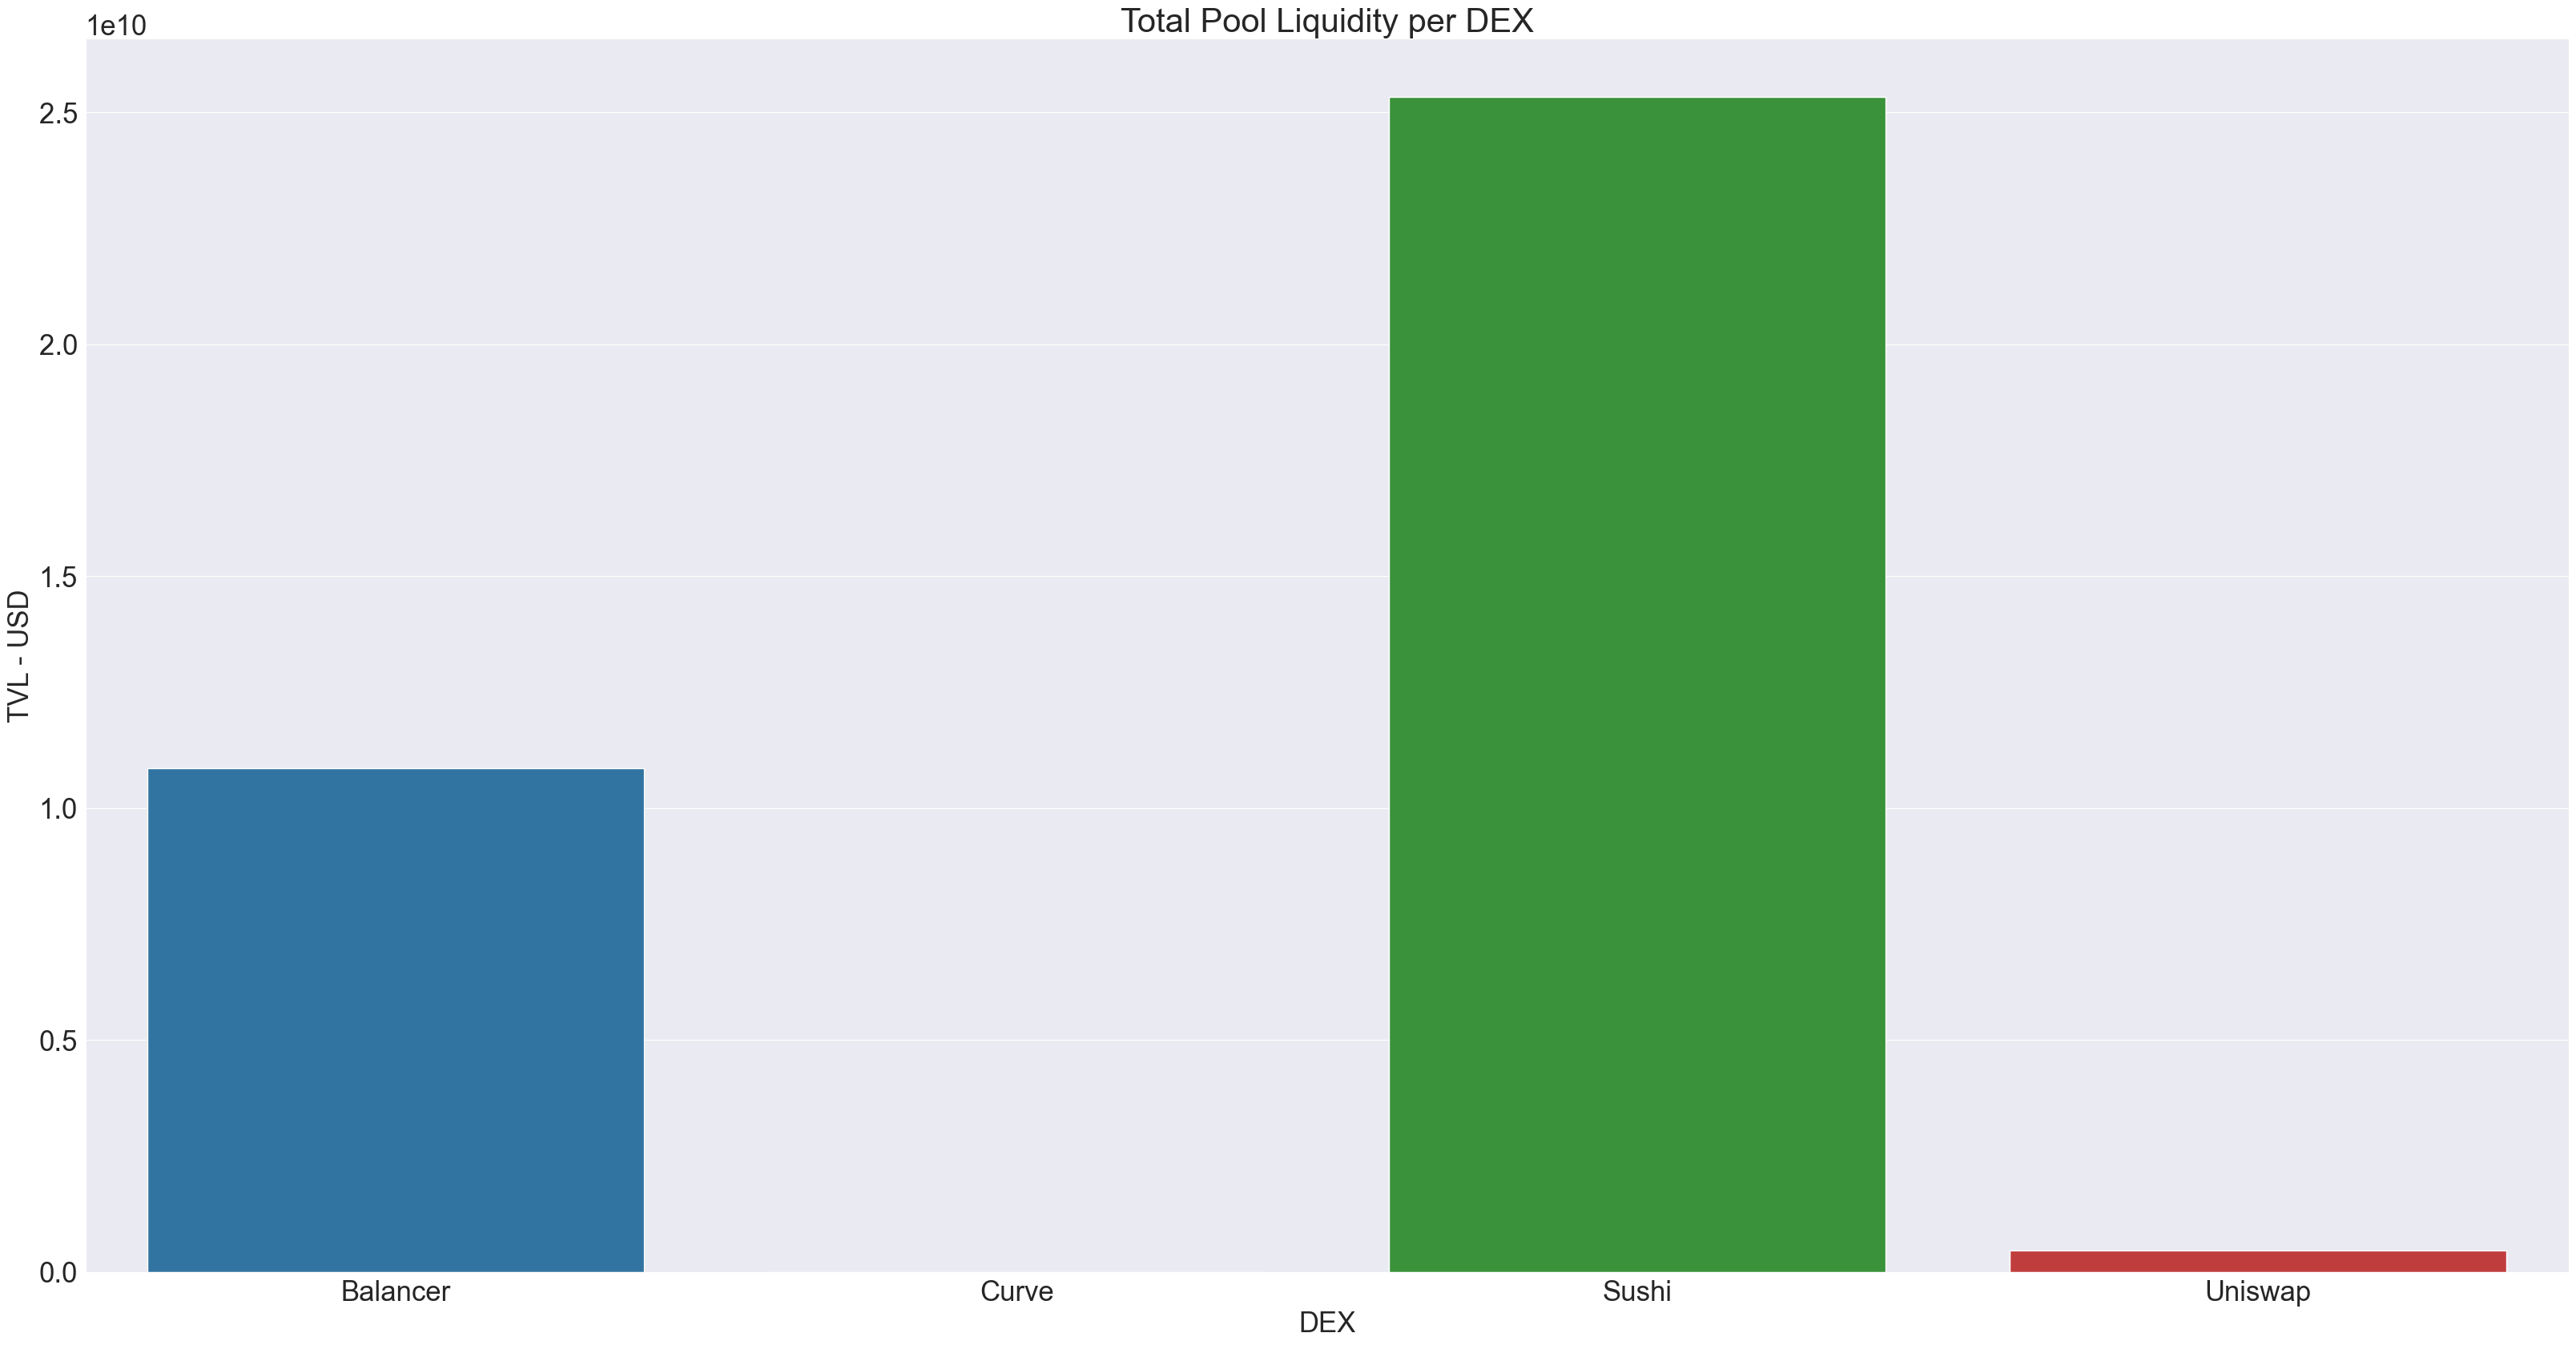

In [17]:
plt.rc("figure", figsize=(40, 20))
#sns.set_style("whitegrid")
plt.rc("font", size=25)


value_locked = pool_data.groupby("dex")["liquidityPoolDailySnapshots_totalValueLockedUSD"].agg("sum").reset_index()
plot_title = 'Total Pool Liquidity per DEX'
chart=sns.barplot(data=value_locked,y="liquidityPoolDailySnapshots_totalValueLockedUSD",x="dex").set(title = plot_title, xlabel = 'DEX', ylabel = 'TVL - USD', )
print(chart)
